# Descriptive statistics of Sysmo


Here I need to show all the descriptive stadistics by project, group and all the collaboration.



### Load the Data


In [2]:
rm(list=ls(all=TRUE))
par(family="serif", las=1, ps=18)

source('~/Dropbox/case_sysmo/Scripts/userSysmo.R')
source('~/Dropbox/case_sysmo/Scripts/assetsSysmo.R')
source('~/Dropbox/case_sysmo/Scripts/projectSysmo.r')
source('~/Dropbox/case_sysmo/Scripts/sharedAssetSysmo.r')
source('~/Dropbox/case_sysmo/Scripts/contrastCodeSysmo.r')
source('~/Dropbox/case_sysmo/Scripts/parallelsetGeneral.r')
source('~/Dropbox/case_sysmo/Scripts/mainSysmo.r')
# source('~/Dropbox/case_sysmo/Scripts/projectsDbM.r')
# source('~/Dropbox/case_sysmo/Scripts/sharingSymo.r')
# library(plotrix)
library(psych)
library(ggplot2)
library(data.table)
library(MASS)
library(dplyr)
library(R6)

theme_set(theme_bw(base_size = 18,base_family="serif")) 

anon_names <- read.csv(file="/Users/kristian/Dropbox/case_sysmo/Data/project_names_anon.csv",sep=",",head=TRUE)
anon_names$project_name <- as.factor(anon_names$project_name)
anon_names$project_name_anon <- as.factor(anon_names$project_name_anon)

secndR<- as.Date("2010-03-01")  # http://www.bbsrc.ac.uk/pa/grants/AwardDetails.aspx?FundingReference=BB%2FI004637%2F1
eval10<- as.Date("2010-05-01")  # http://www.bbsrc.ac.uk/pa/grants/AwardDetails.aspx?FundingReference=BB%2FI004637%2F1
eval11<- as.Date("2011-02-01")  
eval12<- as.Date("2012-05-01")  # https://seek.sysmo-db.org/presentations/38
eval13<- as.Date("2013-03-01")  # https://seek.sysmo-db.org/presentations/85
dps_date<- as.Date("2011-06-01")

eval1<-eval11
eval2<-eval12


## Descriptive information about the Collaborations

What are the collaborations composition in terms of demographics?

We can see that the collaboration are very similar in geographical localtion and in Languages


We measured collaboration diversity using 2 metrics: Location and Language. Language referfers to language diversity we used the country in which the collaborators reside to define their langauge. Location refers to the institution the collaborators belong to. There could be collaborators living in the same country but belonging to different institutions. We use two differement approaches for the measuremente: Shannon diversity and Gini diversity.


- loc_shannon
- loc_gini 
- lang_shannon
- lang_gini

We are available also to count the number of files they own and the average size of those files.

- siz
- Freq


> **Most of these function only deal with DataFiles and do not include Models or Sops**

There was binary information from the interviews that we can relate to the database:

- Interview: Did we interview anybody from the collaboration?
- Fund: where they fundded for a second round
- OpenShare: Did they interviewees said that they share data openly
- Activity: ???

> differences in number of **events_n** to **total** could be related to the discrepancies on the ownership of the files

2. The second step is to get users information  to obtain **number of collaborators** and **how active they have been**


- count.x: Number of collaborators during the first year.
- active: Number of collaborator divided during the projects lifetime. I don't know why

### Using Different Data (Logs)

- 'project_name'
- 'events_n': Number of created assets by the project
- 'contributors_n': Number of contributotrs tothe SDR by project
- 'even_cont': Ration of created assets to contrbituor by project **OR** assets per contributor
- 'collb_n': Number of collaborators by project
- 'lifetime': Project LifeTime
- 'active': Ration of collaborator to lifetime by project **Whatfor??**
- ave_cont_time: Ration of created assets to lifetime by project **OR** assets per year

details at: [here](Improving%20Old%20fuctions.ipynb)

https://en.wikipedia.org/wiki/List_of_galaxy_groups_and_clusters



In [3]:
logsstable<- LogsTable$new()
logsstable$loadtable()
logsstable$getLogBy()
ds<-logsstable$data



ds2 <- ds %>% group_by(project_name) %>% filter(action == "create" & 
                                               (activity_loggable_type == "Sop" | 
                                               activity_loggable_type == "Model" | 
                                               activity_loggable_type == "DataFile")) %>%
      summarise(events_n = n(), 
                contributors_n = n_distinct(contributor_id, na_rm = FALSE)) %>% 
      mutate(even_cont = scale(events_n/contributors_n))
                                                                                                  

users <-getMembers(0) 
new_fr_1 <- users %>% group_by(project_name) %>%
      filter(ncreated_at <= "2010-01-01") %>%
      summarise(collb_n = n())

new_fr = inner_join(ds2,new_fr_1)
new_fr = inner_join(new_fr,getProjInfo())


new_fr <- new_fr %>% mutate(active=scale(collb_n/(lifetime)),
                           ave_cont_time=scale(events_n/(lifetime)),
                           traction = scale(contributors_n/collb_n))


x = inner_join(new_fr,projectContBySize())

x
names(x)



[1] "data.frame"
[1] 82876
[1] "data.frame"
[1] 2011
[1] "I need contributor_id guessDiscipline"


Joining by: "project_name"
Joining by: "project_name"
Loading required package: permute
Loading required package: lattice
This is vegan 2.3-3
reldist: Relative Distribution Methods
Version 1.6-4 created on 2015-01-01.
copyright (c) 2003, Mark S. Handcock, University of California-Los Angeles
 For citation information, type citation("reldist").
 Type help(package="reldist") to get started.



[1] "I need contributor_id guessDiscipline"


Joining by: c("project_name", "id", "name")


Source: local data frame [10 x 22]

   project_name events_n contributors_n  even_cont collb_n    id         name
         (fctr)    (int)          (int)      (dbl)   (int) (int)       (fctr)
1  BaCell-SysMO       77              8  0.5500851      25     1 BaCell-SysMO
2        COSMIC       62              8  0.1633401      22     2       COSMIC
3         MOSES        8              4 -1.0226780       7     8        MOSES
4        PSYSMO        8              1  0.2149061      12     6       PSYSMO
5        STREAM       12              1  1.0399622      10    10       STREAM
6      SulfoSys        6              1 -0.1976219      15    11     SulfoSys
7          SUMO       23              9 -0.9080869      17     3         SUMO
8      SysMO DB       95              5  2.4838103       7    12     SysMO DB
9     SysMO-LAB       56             15 -0.6651537      12     5    SysMO-LAB
10  TRANSLUCENT       10              2 -0.4038860      13     9  TRANSLUCENT
Variables not shown: interview (lgl), fund (chr), openShare (lgl), activity
  (lgl), lifetime (dbl), active (dbl), ave_cont_time (dbl), traction (dbl),
  project_id (int), siz (dbl), Freq (int), loc_shannon (dbl), loc_gini (dbl),
  lang_shannon (dbl), lang_gini (dbl)

[1] "project_name"   "events_n"       "contributors_n" "even_cont"     
 [5] "collb_n"        "id"             "name"           "interview"     
 [9] "fund"           "openShare"      "activity"       "lifetime"      
[13] "active"         "ave_cont_time"  "traction"       "project_id"    
[17] "siz"            "Freq"           "loc_shannon"    "loc_gini"      
[21] "lang_shannon"   "lang_gini"

project_name project_name_anon
1          SUMO            BULLET
2     SysMO-LAB         BURBIDGE 
3        COSMIC         COPELAND 
4         MOSES         DEER-LICK
5  BaCell-SysMO               LEO
6      SulfoSys         MARKARIAN
7        PSYSMO           ROBERT 
8   TRANSLUCENT           SEYFERT
9        STREAM           STEPHAN
10   SilicoTryp            ZWICKY
11     SYSMO DB           BORRAME
12  Noisy-Strep              WILD

Joining by: "project_name"
Warning message:
In left_join_impl(x, y, by$x, by$y): joining factors with different levels, coercing to character vector

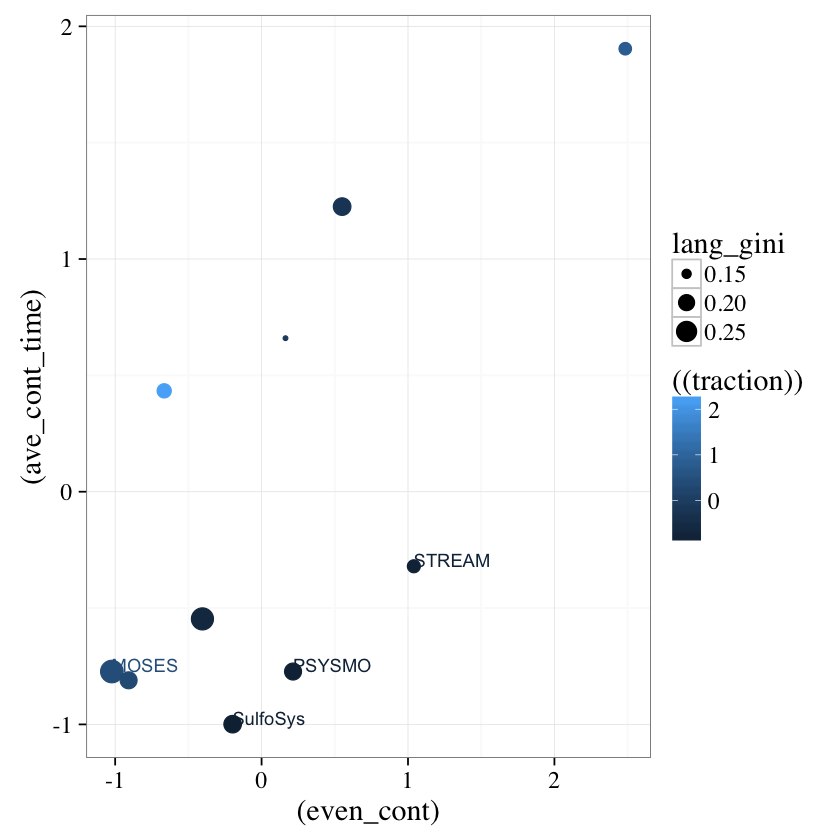

In [4]:
anon_names <- read.csv(file="/Users/kristian/Dropbox/case_sysmo/Data/project_names_anon.csv",sep=",",head=TRUE)
anon_names$project_name <- as.factor(anon_names$project_name)
anon_names$project_name_anon <- as.factor(anon_names$project_name_anon)
anon_names
x <- left_join(x, anon_names)

sp1 <- ggplot(x, aes(colour=((traction)),trans="log")) +
# geom_bar(stat="identity") +
geom_point(aes(y=(ave_cont_time), x=(even_cont),size=lang_gini, label=project_name_anon )) +
geom_text(aes(y=(ave_cont_time), x=(even_cont),
              label=ifelse(fund=="FALSE",as.character(project_name),'')),
          hjust=0, vjust=0)


#   geom_text(aes(label=ifelse(PTS>24,as.character(Name),'')),hjust=0,just=0)

# sp1 + facet_grid(fund ~. )
sp1



## Collaborations Self-deposition

In terms of seldopistion how were the collaborations sef-depositing "competitive datasets"

> **competitive datasets**: are materials (e.g. datafiles, models, sop) excludes outputs (e.g. presentations, paper, etc)


In [5]:


# ds<-getLogBy("create",239)
logsstable<- LogsTable$new()
logsstable$loadtable()
logsstable$getLogBy()
ds<-logsstable$data
# logsstable$getLogBy()
# logsstable$graphLogs()


ds$project_name <- factor(ds$project_name, levels = c("COSMIC",  "SysMO-LAB", "BaCell-SysMO","SUMO", "SilicoTryp","MOSES"))

ds<-ds[(ds$action %in% c("create")),]
ds<-ds[!(ds$activity_loggable_type %in% c("Publication")),]
ds<-ds[!(ds$activity_loggable_type %in% c("Study")),]
ds<-ds[!(ds$activity_loggable_type %in% c("Presentation")),]
ds<-ds[!(ds$activity_loggable_type %in% c("Investigation")),]

dx <- as.data.table(ds)
setkeyv(dx, cols=c('ncreated_at',"project_name","activity_loggable_type"))
ds <- dx[, list(count=.N), by=c('ncreated_at',"project_name","activity_loggable_type")]

ds<-ds[(ds$project_name %in% c("COSMIC", "SUMO", "MOSES","SysMO-LAB","SilicoTryp", "BaCell-SysMO")),]

ds$Date<-ds$ncreated_at
ds$Asset_type<-ds$activity_loggable_type
ds$Activity<-ds$count
# ds$fund<-ds$fund

ds1 <- ds
pdf <- ds1 %>% group_by(project_name) %>% arrange(Date)  %>% mutate(cmml = cumsum(Activity))




pdf <- pdf %>% group_by(project_name)  %>% mutate(norm = (Activity-min(Activity))/(max(Activity)-min(Activity)))
pdf4 <- ds1 %>% group_by(project_name)  %>% mutate(norm = (Activity-min(Activity))/(max(Activity)-min(Activity)))
ds2 <- ds
pdf2 <- ds2  %>% arrange(Date)  %>% mutate(cmml = cumsum(Activity))


require(quantmod)
require(reshape2)
# require(plyr)

require(scales)


# pdf2 <- pdf2 %>% group_by(date) %>% mutate(yearmonth=as.yearmon(Date))
head(pdf2)
require(dplyr)

# pdf2 %>% group_by(project_name, Asset_type )%>% arrange(Date) %>% summarise(evetns=n(),sactivity=sum(Activity),scmml=sum(cmml)  )
pdf2 %>% group_by(project_name, Date  )%>% arrange(Date) %>% summarise(evetns=n(),sactivity=sum(Activity),scmml=sum(cmml)  )


[1] "data.frame"
[1] 82876
[1] "data.frame"
[1] 2011


Loading required package: quantmod
Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Attaching package: ‘xts’

The following objects are masked from ‘package:dplyr’:

    first, last

The following object is masked from ‘package:data.table’:

    last

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.
Loading required package: reshape2

Attaching package: ‘reshape2’

The following objects are masked from ‘package:data.table’:

    dcast, melt

Loading required package: scales

Attaching package: ‘scales’

The following objects are masked from ‘package:psych’:

    alpha, rescale



ncreated_at project_name activity_loggable_type count       Date Asset_type
1:  2010-06-03 BaCell-SysMO               DataFile     1 2010-06-03   DataFile
2:  2010-06-04       COSMIC                  Model     2 2010-06-04      Model
3:  2010-06-06        MOSES                    Sop     1 2010-06-06        Sop
4:  2010-06-08        MOSES                  Assay     4 2010-06-08      Assay
5:  2010-06-08        MOSES               DataFile     1 2010-06-08   DataFile
6:  2010-06-11    SysMO-LAB                  Assay     4 2010-06-11      Assay
   Activity cmml
1:        1    1
2:        2    3
3:        1    4
4:        4    8
5:        1    9
6:        4   13

ERROR: Error in dimnames.data.table(x): data.table inherits from data.frame (from v1.5) but this data.table does not. Has it been created manually (e.g. by using 'structure' rather than 'data.table') or saved to disk using a prior version of data.table? The correct class is c('data.table','data.frame').


Source: local data table [114 x 5]
Groups: project_name

   project_name       Date evetns sactivity scmml
         (fctr)     (date)  (int)     (int) (int)
1        COSMIC 2010-06-04      1         2     3
2        COSMIC 2010-11-08      1         8    35
3        COSMIC 2010-11-15      2         7    83
4        COSMIC 2011-11-03      2         2   199
5        COSMIC 2012-03-23      1         3   137
6        COSMIC 2012-04-03      3         8   442
7        COSMIC 2012-04-05      1         7   161
8        COSMIC 2012-04-10      2         5   333
9        COSMIC 2012-04-11      1         1   171
10       COSMIC 2012-04-12      1         4   175
..          ...        ...    ...       ...   ...

#### Plotting

1. Self-deposition events
1. Cummulative Self-deposition events
1. Cummulative Self-deposition events Aggregated

> Add a column for control and experimental. MOSES is out of the norms

Annonimizing titles


In [6]:
pdf2 <- data.frame(pdf2)
pdf23 <- inner_join(pdf2, anon_names)




Joining by: "project_name"
Warning message:
In inner_join_impl(x, y, by$x, by$y): joining factors with different levels, coercing to character vector

[1] 15006


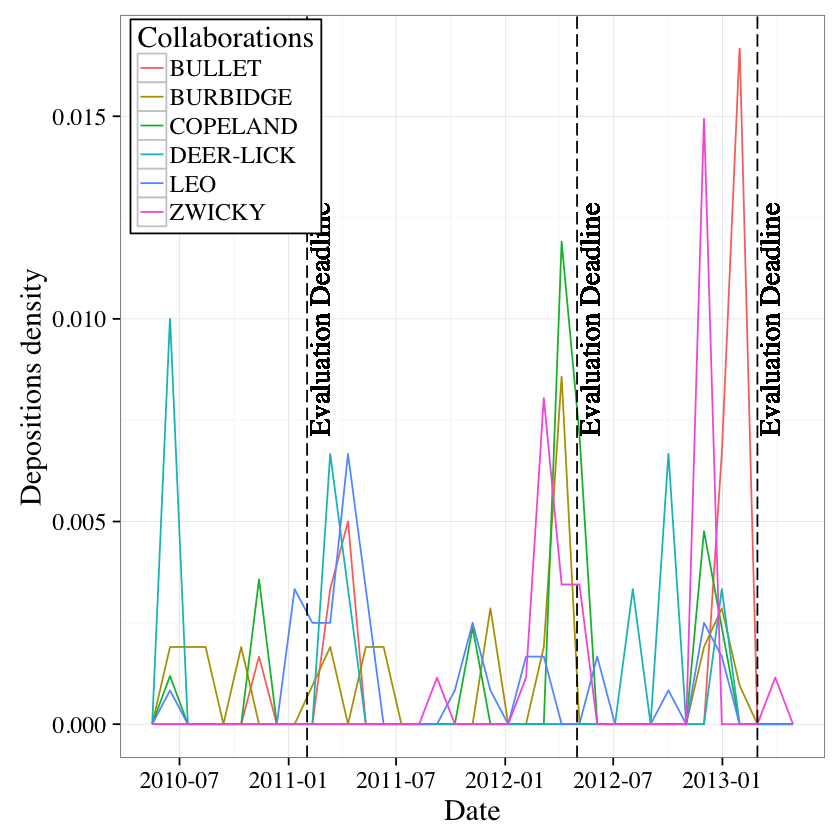

In [7]:
df<- as.numeric(eval11)
print(df)
# datehist <- ggplot(pdf23, aes(Date, fill=project_name_anon)) + 
# geom_histogram()    + 
datehist <- ggplot(pdf23, aes(Date, ..density.., colour=project_name_anon)) + 
geom_freqpoly(binwidth = 30) +
geom_vline(xintercept = as.numeric(eval11), linetype=5)   + 
geom_vline(xintercept = as.numeric(eval12), linetype=5)  + 
geom_vline(xintercept = as.numeric(eval13), linetype=5)  + 
scale_fill_grey(start = 0.1, end = .8)  + theme(legend.position= c(.15, .85), legend.background = element_rect(colour = "black")) +
labs(colour = "Collaborations", y="Depositions density") +
geom_text(aes(x=eval11+22, y=0.010, label="Evaluation Deadline",family="serif"), colour="black", angle=90, size=6) +
geom_text(aes(x=eval12+22, y=0.010, label="Evaluation Deadline",family="serif"), colour="black", angle=90, size=6) +
geom_text(aes(x=eval13+22, y=0.010, label="Evaluation Deadline",family="serif"), colour="black", angle=90, size=6) 


p4<-datehist #+ dal2 #+ facet_grid(project_name ~ ., scales="free_y" )
p4

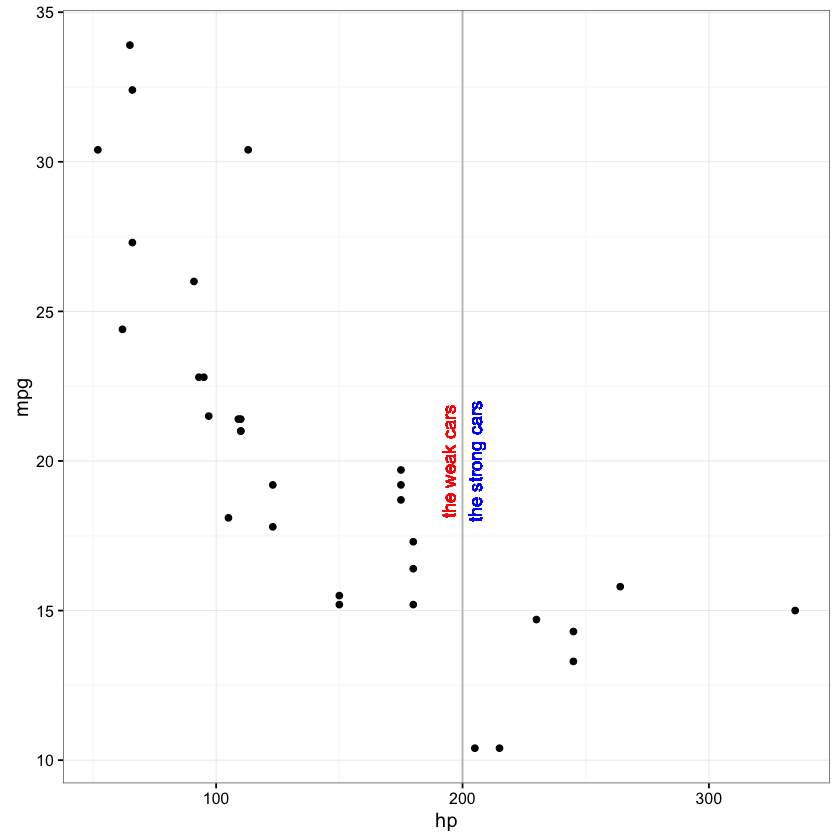

In [8]:
ggplot(data=mtcars, aes(x=hp, y=mpg)) +
  geom_point() +
  theme_bw() +
  geom_vline(xintercept=200, colour="grey") +
  geom_text(aes(x=200, label="\nthe strong cars", y=20), colour="blue", angle=90) +
  geom_text(aes(x=200, label="the weak cars\n", y=20), colour="red", angle=90)



Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Loading required package: grid


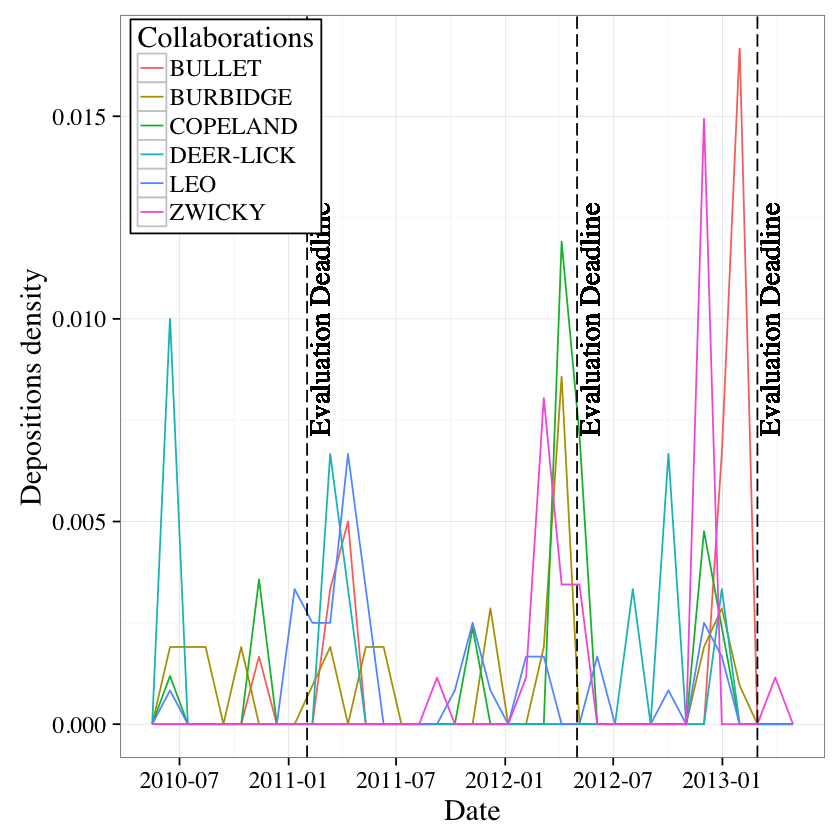

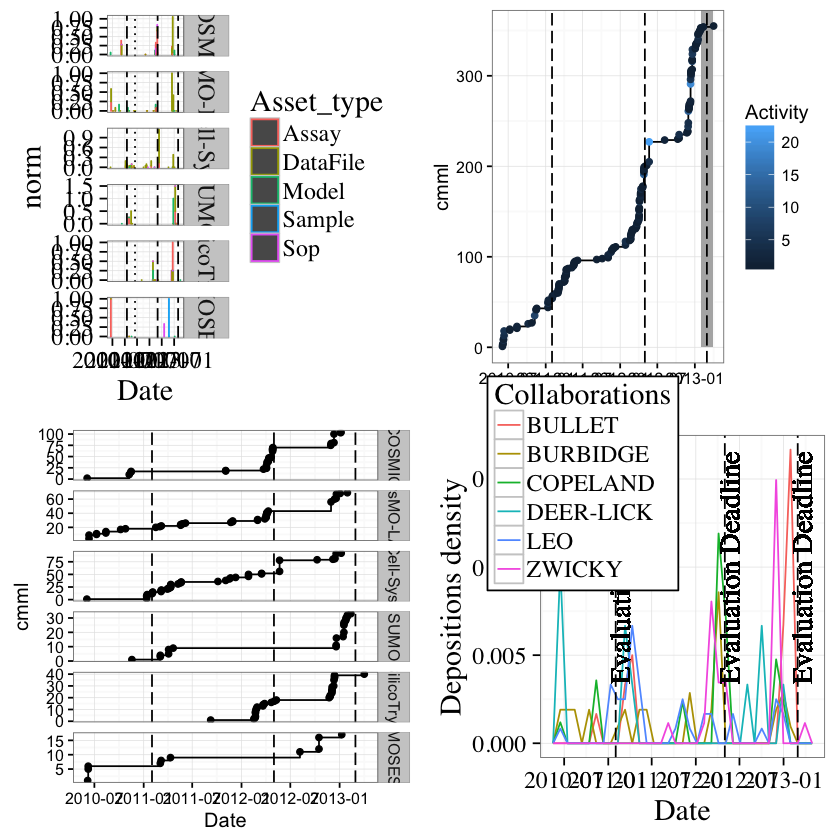

In [9]:


sp <- ggplot(pdf4, aes(x=Date, y=norm, group=Asset_type, color=Asset_type))  + geom_bar(stat="identity") 
p1 <- sp + facet_grid(project_name ~ . , scales="free_y")       + geom_vline(xintercept = as.numeric(eval11), linetype=5)   + geom_vline(xintercept = as.numeric(eval12), linetype=5)  + geom_vline(xintercept = as.numeric(eval13), linetype=5)   + geom_vline(xintercept = as.numeric(dps_date), linetype=3)
ggsave("~/Dropbox/case_sysmo/images/figcontributionevetns.png")

cmmlp <- ggplot(pdf, aes(x=Date, y=cmml))  +  
# geom_rect(data = pdf,alpha = 0.3,aes(fill = project_name),xmin = -Inf,xmax = Inf, ymin = -Inf,ymax = Inf) +
geom_step() + 
geom_point(aes()) +  scale_colour_gradient(trans="log") #+  geom_line( aes(x=Date, y=2*cmml)) #geom_histogram(aes(y = 3*..density..), alpha = 0.2, binwidth = 3) + stat_ecdf(aes(x = Activity))
p2 <- cmmlp + facet_grid(project_name ~ ., scales="free_y" )  + 
geom_vline(xintercept = as.numeric(eval11), linetype=5)   + 
geom_vline(xintercept = as.numeric(eval12), linetype=5)  + 
geom_vline(xintercept = as.numeric(eval13), linetype=5)  + scale_fill_grey(start = 0.1, end = .9) + theme_bw() #+ geom_vline(xintercept = as.numeric(dps_date), linetype=3) 


ggsave("~/Dropbox/case_sysmo/images/figcontributioncmmlbyproject.png")

cmmlpagg <- ggplot(pdf2, aes(x=Date, y=cmml)) + 
geom_rect(aes(xmin=eval13 - 30, xmax=eval13 + 30, ymin=0, ymax=Inf), fill="grey70",alpha=0.5)  +  
geom_step() +  geom_point(aes(colour = Activity))#+  geom_line( aes(x=Date, y=2*cmml)) #geom_histogram(aes(y = 3*..density..), alpha = 0.2, binwidth = 3) + stat_ecdf(aes(x = Activity))

p3 <- cmmlpagg  + geom_vline(xintercept = as.numeric(eval11), linetype=5)   + 
geom_vline(xintercept = as.numeric(eval12), linetype=5)  + 
geom_vline(xintercept = as.numeric(eval13), linetype=5)  + scale_fill_grey(start = 0.1, end = .9) + theme_bw()  
ggsave("~/Dropbox/case_sysmo/images/figcontributioncmml.png")



  

# datehist <- ggplot(pdf23, aes(Date, fill=project_name_anon)) + 
# geom_histogram()    + 
datehist <- ggplot(pdf23, aes(Date, ..density.., colour=project_name_anon)) + 
geom_freqpoly(binwidth = 30) +
geom_vline(xintercept = as.numeric(eval11), linetype=5)   + 
geom_vline(xintercept = as.numeric(eval12), linetype=5)  + 
geom_vline(xintercept = as.numeric(eval13), linetype=5)  + 
scale_fill_grey(start = 0.1, end = .8)  + theme(legend.position= c(.15, .85), legend.background = element_rect(colour = "black")) +
labs(colour = "Collaborations", y="Depositions density") +
geom_text(aes(x=eval11+22, y=0.010, label="Evaluation Deadline",family="serif"), colour="black", angle=90, size=6) +
geom_text(aes(x=eval12+22, y=0.010, label="Evaluation Deadline",family="serif"), colour="black", angle=90, size=6) +
geom_text(aes(x=eval13+22, y=0.010, label="Evaluation Deadline",family="serif"), colour="black", angle=90, size=6) 


p4<-datehist #+ dal2 #+ facet_grid(project_name ~ ., scales="free_y" )
p4

ggsave("~/Dropbox/case_sysmo/images/figcontributionhist.png")


multiplot(p1,p2,p3,p4, cols=2)


#### Showing the Longtail

[1] "data.frame"
[1] 82876
[1] "data.frame"
[1] 2011


Source: local data frame [6 x 2]

  contributor_id hist_n
          (fctr)  (int)
1            101     13
2            104      2
3            105     12
4            106     39
5            107     20
6            108     35

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


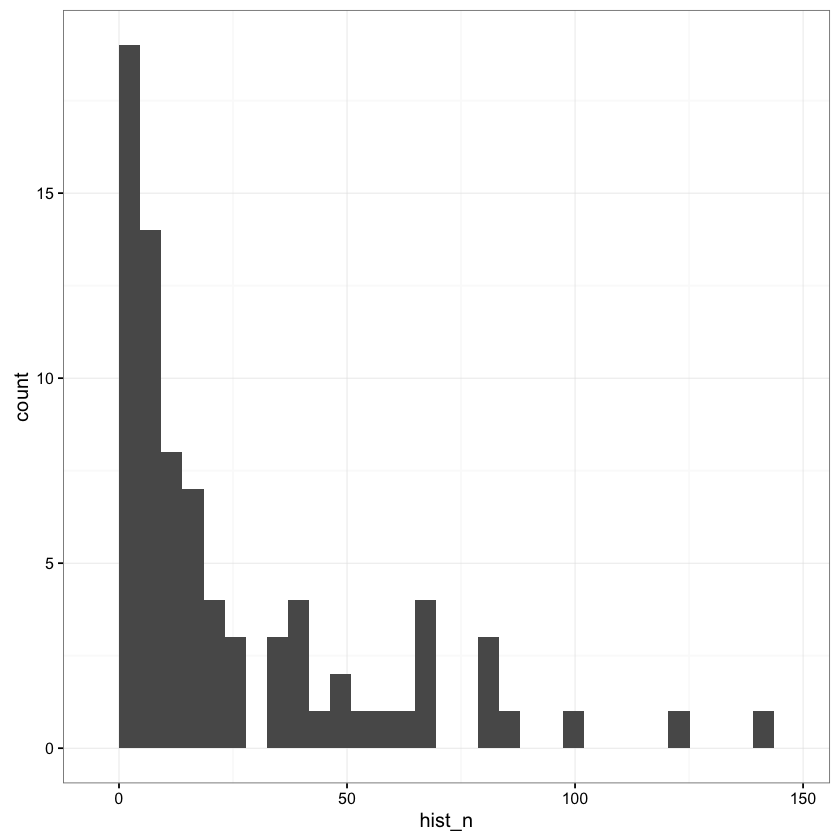

In [10]:
logsstable<- LogsTable$new()
logsstable$loadtable()
logsstable$getLogBy()
ds<-logsstable$data


ds1 <- ds %>% group_by(contributor_id) %>% summarise(hist_n=n())

head(ds1)

cmmlhist <- ggplot(ds1, aes(hist_n), binwidth = 0.05)  +
geom_histogram()    + 
scale_fill_grey(start = 0.1, end = .9) + theme_bw() #+ geom_vline(xintercept = as.numeric(dps_date), linetype=3) 

p5<-cmmlhist
p5

The Self-contribution activity can be also seen in term of intensitive

4. We can also see which periods were more intense for the collaborations

In [11]:


require(quantmod)
require(ggplot2)
require(reshape2)
# require(plyr)
require(scales)

dat<-pdf4 

dat$date<-dat$ncreated_at


# We will facet by year ~ month, and each subgraph will
# show week-of-month versus weekday
# the year is simple
dat$year<-as.numeric(as.POSIXlt(dat$date)$year+1900)
# the month too 
dat$month<-as.numeric(as.POSIXlt(dat$date)$mon+1)
# but turn months into ordered facors to control the appearance/ordering in the presentation
dat$monthf<-factor(dat$month,levels=as.character(1:12),labels=c("Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"),ordered=TRUE)
# the day of week is again easily found
dat$weekday = as.POSIXlt(dat$date)$wday
# again turn into factors to control appearance/abbreviation and ordering
# I use the reverse function rev here to order the week top down in the graph
# you can cut it out to reverse week order
dat$weekdayf<-factor(dat$weekday,levels=rev(1:7),labels=rev(c("Mon","Tue","Wed","Thu","Fri","Sat","Sun")),ordered=TRUE)
# the monthweek part is a bit trickier 
# first a factor which cuts the data into month chunks
dat$yearmonth<-as.yearmon(dat$date)
dat$yearmonthf<-factor(dat$yearmonth)
# then find the "week of year" for each day
dat$week <- as.numeric(format(dat$date,"%W"))
# and now for each monthblock we normalize the week to start at 1 
dat<-ddply(dat,.(yearmonthf),transform,monthweek=1+week-min(week))




ERROR: Error in eval(expr, envir, enclos): could not find function "ddply"


Saving 7 x 7 in image
Saving 7 x 7 in image


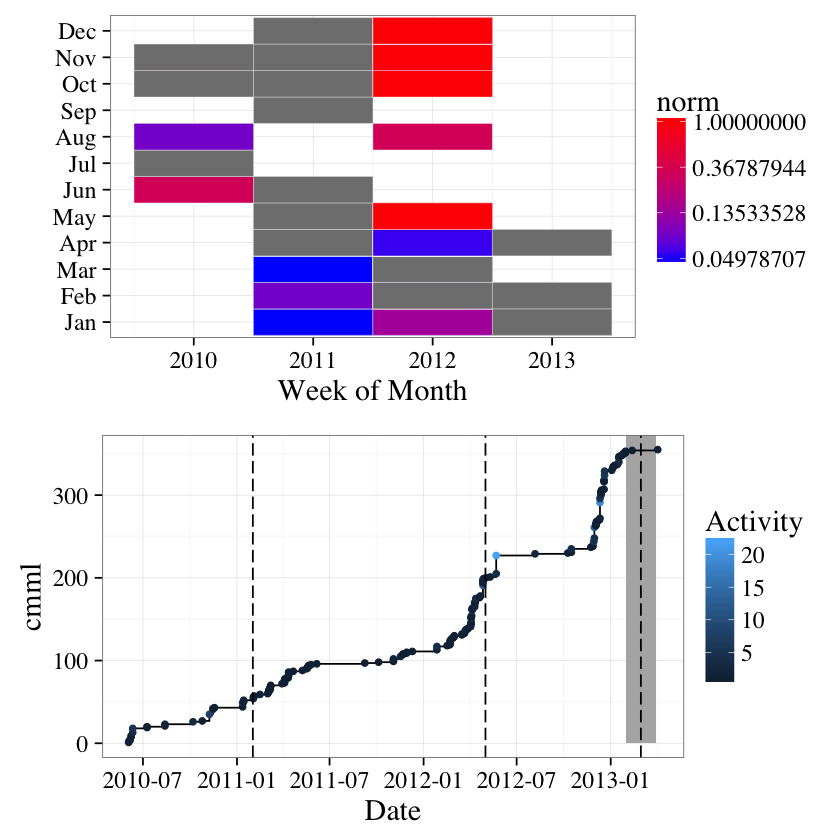

In [12]:

# Now for the plot
#P<- ggplot(dat, aes(monthweek, weekdayf, fill = VIX.Close)) + geom_tile(colour = "white") + facet_grid(year~monthf) + scale_fill_gradient(low="red", high="yellow") +   xlab("Week of Month") + ylab("")
P<- ggplot(dat, aes(year,monthf, fill = norm)) +
geom_tile(colour = "white")  + scale_fill_gradient(low = "blue", high="red",  trans="log") + 
xlab("Week of Month") + ylab("")



p3 <- cmmlpagg  + geom_vline(xintercept = as.numeric(eval11), linetype=5)   + 
geom_vline(xintercept = as.numeric(eval12), linetype=5)  + 
geom_vline(xintercept = as.numeric(eval13), linetype=5)    
ggsave("~/Dropbox/case_sysmo/images/figcontributioncmml.png")



multiplot(P,p3, cols=1)
ggsave("~/Dropbox/case_sysmo/images/figcontributionStrength.png")

# Self-depostions differences Shared vs Restricted


- What are the number of assets shared to assets restricted?


In [18]:

# d<-getOpenAssets('data_file')
# d<-getOpenAssets('model')
# d<-getOpenAssets('sop')
# print(head(d))

# print(processSharingReportSharing("model",8))
# print(processSharingReportSum(2))

# print(isOpenShared(getAllresc(0)))


dat<-isOpenShared(getAllresc(0))

dat$project_name <- factor(dat$project_name, levels = c("COSMIC",  "SysMO-LAB", "BaCell-SysMO","SUMO", "SilicoTryp","MOSES"))


# dat <- as.data.table(dat)
# setkeyv(dat, cols=c('ncreated_at',"project_name","lab","type"))
# dat <- dat[, list(count=.N), by=c('ncreated_at',"project_name","lab","type")]

# dat %>% group_by(project_name,ncreated_at,lab,type) %>% summarise(assets_n=n())
# print(dat)



dat1 <- dat

# dat1$type[dat1$type != "Publication"] <- "Datasets"  

# pdf3 <- dat1 %>% group_by(project_name) %>% 
# arrange(lab) %>% arrange(type) %>% 
# mutate(perc= count/n(),
#         norm = (count-min(count))/(max(count)-min(count)),
#        scal = scale(count))
# pdf3 <- dat1 %>% group_by(lab)  %>% mutate(norm = (count-min(count))/(max(count)-min(count)))

names(dat)

pdf6 <- dat1 %>% group_by(project_name,lab)  %>% 
            filter(project_name == "SUMO" |
                  project_name == "SilicoTryp" |
                  project_name == "MOSES" |
                  project_name == "SysMO-LAB" |
                  project_name == "COSMIC" |
                  project_name == "BaCell-SysMO")%>% 
            summarise(count = n()) 

pdf7 <- dat1 %>% group_by(project_name)  %>% 
            filter(project_name == "SUMO" |
                  project_name == "SilicoTryp" |
                  project_name == "MOSES" |
                  project_name == "SysMO-LAB" |
                  project_name == "COSMIC" |
                  project_name == "BaCell-SysMO")%>% 
            summarise(total = n()) 

# pdf6 <- pdf6 %>% summarise(norm = (count-min(count))/(max(count)-min(count)),
#        scal = scale(count))

pdf6 <- inner_join(pdf6,pdf7) %>% mutate(perc = count/total)

print(pdf6)


[1] "I need contributor_id guessDiscipline"
 [1] 12 12 12  2  1  1 12 12  1 12 12 12  1  5 14  1  5 12 12 12 12  1 12 12 14
[26] 12  8 12  3
[1] "I need contributor_id guessDiscipline"
 [1] 12 12 12  8  3  1  1  1  1  1  1 12  1  1  1  8  8  8  1  8  8 12  8  8 12
[26]  8 12 15  1  1 12  1  1  1 12 12  1  1  1  1  1 12  1 12 12  1  1 12 12  1
[1] "I need contributor_id guessDiscipline"
 [1] 14  8  8  8  8  8  3  8  8  3 14  3 14


[1] "type"             "id"               "person_id"        "contributor_id"  
 [5] "ncreated_at"      "nupdated_at"      "contributor_type" "version"         
 [9] "project_id"       "project_name"     "lab"

Joining by: "project_name"


Source: local data frame [12 x 5]
Groups: project_name [6]

   project_name         lab count total       perc
         (fctr)      (fctr) (int) (int)      (dbl)
1        COSMIC opensharing     1    58 0.01724138
2        COSMIC     private    57    58 0.98275862
3     SysMO-LAB opensharing     2    40 0.05000000
4     SysMO-LAB     private    38    40 0.95000000
5  BaCell-SysMO opensharing    30    90 0.33333333
6  BaCell-SysMO     private    60    90 0.66666667
7          SUMO opensharing     5    58 0.08620690
8          SUMO     private    53    58 0.91379310
9    SilicoTryp opensharing     5    26 0.19230769
10   SilicoTryp     private    21    26 0.80769231
11        MOSES opensharing    17    24 0.70833333
12        MOSES     private     7    24 0.29166667


In [19]:
anon_names <- read.csv(file="/Users/kristian/Dropbox/case_sysmo/Data/project_names_anon.csv",sep=",",head=TRUE)
anon_names$project_name <- as.factor(anon_names$project_name)
anon_names$project_name_anon <- as.factor(anon_names$project_name_anon)
pdf6 <- inner_join(pdf6, anon_names)
pdf3 <- inner_join(pdf3, anon_names)

pdf6 <- data.frame(pdf6)
pdf6$lab <- as.character(pdf6$lab)
pdf6$lab[pdf6$lab == "private"] <- "Specific"
pdf6$lab[pdf6$lab == "opensharing"] <- "Publishing"
pdf6

Joining by: "project_name"
Warning message:
In inner_join_impl(x, y, by$x, by$y): joining factors with different levels, coercing to character vector

ERROR: Error in inner_join(pdf3, anon_names): object 'pdf3' not found


project_name        lab count total       perc project_name_anon
1        COSMIC Publishing     1    58 0.01724138         COPELAND 
2        COSMIC   Specific    57    58 0.98275862         COPELAND 
3     SysMO-LAB Publishing     2    40 0.05000000         BURBIDGE 
4     SysMO-LAB   Specific    38    40 0.95000000         BURBIDGE 
5  BaCell-SysMO Publishing    30    90 0.33333333               LEO
6  BaCell-SysMO   Specific    60    90 0.66666667               LEO
7          SUMO Publishing     5    58 0.08620690            BULLET
8          SUMO   Specific    53    58 0.91379310            BULLET
9    SilicoTryp Publishing     5    26 0.19230769            ZWICKY
10   SilicoTryp   Specific    21    26 0.80769231            ZWICKY
11        MOSES Publishing    17    24 0.70833333         DEER-LICK
12        MOSES   Specific     7    24 0.29166667         DEER-LICK

Saving 7 x 7 in image


ERROR: Error in ggplot(pdf3, aes(ncreated_at, norm, fill = (lab))): object 'pdf3' not found


Saving 7 x 7 in image


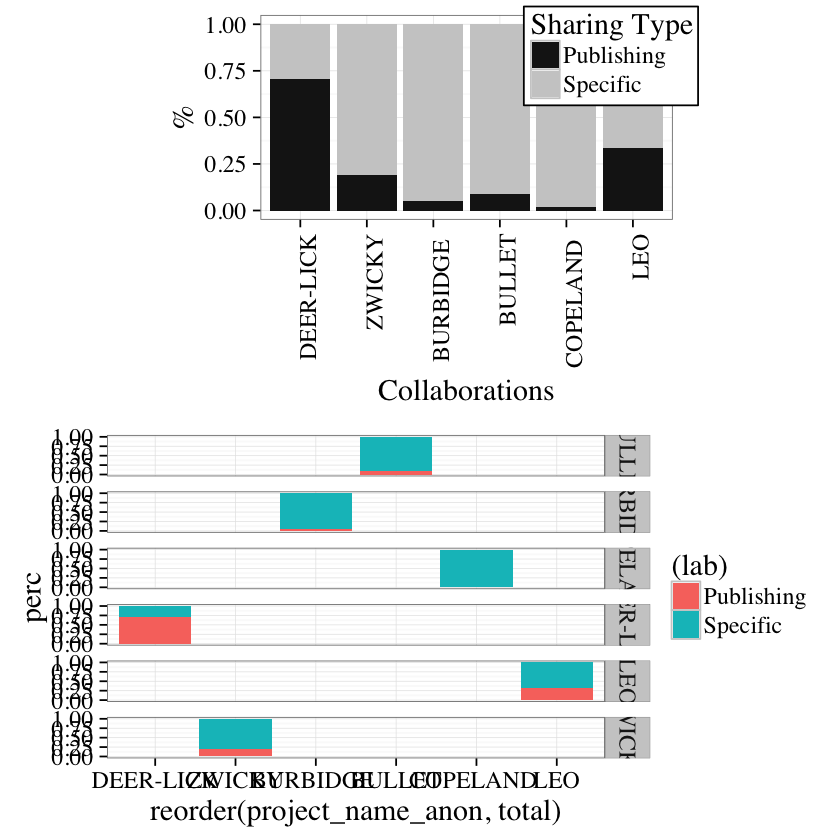

In [21]:

p1<- ggplot(pdf6, aes(x= reorder(project_name_anon,total),
                      perc,  fill = (lab))) + geom_bar(stat="identity") 
p7<-p1 + scale_fill_grey(start = 0.1, end = .8)  + coord_fixed(ratio=2.8) +  
theme(axis.text.x = element_text(angle = 90, hjust = 1),legend.position= c(.85, .8),legend.background = element_rect(colour = "black")) +
labs(x = "Collaborations",
     y="%",
    fill="Sharing Type")

ggsave("~/Dropbox/case_sysmo/images/figdatashasedall.png")


p1<- ggplot(pdf3, aes(ncreated_at,norm,  fill = (lab))) + geom_bar(stat="identity")  
p4<- p1 + facet_grid(project_name_anon ~ . , scales="free_y") 

multiplot(p7,p4, cols=1)
ggsave("~/Dropbox/case_sysmo/images/figdatashasedalltime.png")

### Difference between disciplines

- How do they contribute?
- Which one does more general sharing?

In [15]:


dat<-dat[!(dat$type %in% c("sop")),]

dats = dat

names(pro_data)[names(pro_data)=="count"] <- "many"

print(head(dat))
dats3<- merge(dats, pro_data)

print(head(dats3))

pdf4 <- dats3 %>% group_by(project_name) %>% arrange(lab) %>% arrange(type) %>% mutate(norm = (count-min(count))/(max(count)-min(count))/participants) 

print(head(pdf4))
p1<- ggplot(pdf4, aes(project_name, norm,  fill = (lab))) + geom_bar(stat="identity",position="dodge") 
p6<-p1 + scale_fill_grey(start = 0.1, end = .9) + theme_bw() # + facet_grid(type ~ project_name , scales="free_y")

multiplot(p6, cols=1)
ggsave("~/Dropbox/case_sysmo/images/figdatashaseddisc.png")

ERROR: Error in names(pro_data)[names(pro_data) == "count"] <- "many": object 'pro_data' not found


       type id person_id contributor_id ncreated_at nupdated_at
1 data_file  1        53             13  2009-10-26  2010-04-01
2 data_file  2       136              9  2009-10-26  2012-12-19
3 data_file  3       132              6  2009-10-26  2009-10-26
4 data_file  5       220            150  2009-10-26  2009-10-26
5 data_file  6       280             88  2009-10-26  2009-10-26
6 data_file  8       132              6  2010-10-21  2012-03-14
  contributor_type version project_id project_name         lab
1             User       1          3         SUMO     private
2             User       1         12         <NA>     private
3             User       1         12         <NA>     private
4             User       1          6         <NA>     private
5             User       1          1 BaCell-SysMO     private
6             User       3         12         <NA> opensharing


ERROR: Error in as.data.frame(y): object 'pro_data' not found


ERROR: Error in head(dats3): object 'dats3' not found


ERROR: Error in eval(expr, envir, enclos): object 'dats3' not found


  ncreated_at project_name activity_loggable_type count       Date Asset_type
1  2010-06-03 BaCell-SysMO               DataFile     1 2010-06-03   DataFile
2  2010-06-04       COSMIC                  Model     2 2010-06-04      Model
3  2010-06-06        MOSES                    Sop     1 2010-06-06        Sop
4  2010-06-08        MOSES                  Assay     4 2010-06-08      Assay
5  2010-06-08        MOSES               DataFile     1 2010-06-08   DataFile
6  2010-06-11    SysMO-LAB                  Assay     4 2010-06-11      Assay
  Activity       norm
1        1 0.00000000
2        2 0.05555556
3        1 0.00000000
4        4 1.00000000
5        1 0.00000000
6        4 0.25000000


ERROR: Error in eval(expr, envir, enclos): object 'lab' not found


Saving 7 x 7 in image


ERROR: Error in eval(expr, envir, enclos): object 'lab' not found


ERROR: Error in file(con, "rb"): cannot open the connection


ERROR: Error in file(con, "rb"): cannot open the connection


plot without title

> Need to validate agains my otehr routines

> processSharingReportDiscipline()

> graphSharingReportDiscipline()

[1] "data.frame"
[1] "You changed the size of the data"
[1] 1
[1] 248
[1] "data.frame"
[1] "DataFile"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "You changed the size of the data"
[1] 248
[1] 255


[1] "type"             "id"               "contributor_type" "contributor_id"  
 [5] "title"            "description"      "template_id"      "last_used_at"    
 [9] "created_at"       "updated_at"       "version"          "first_letter"    
[13] "other_creators"   "uuid"             "policy_id"        "is_with_sample"  
[17] "template_name"    "ncreated_at"      "nupdated_at"      "filesize"        
[21] "project_id"       "content.type"     "project_name"     "object_id"

[1] "data.frame"
[1] "You changed the size of the data"
[1] 1
[1] 81
[1] "data.frame"
[1] "Model"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "You changed the size of the data"
[1] 81
[1] 85


Warning message:
: Removed 1 rows containing non-finite values (stat_bin).Warning message:
: Removed 1 rows containing non-finite values (stat_bin).Warning message:
: Removed 12 rows containing missing values (geom_bar).Warning message:
: Removed 12 rows containing missing values (geom_bar).

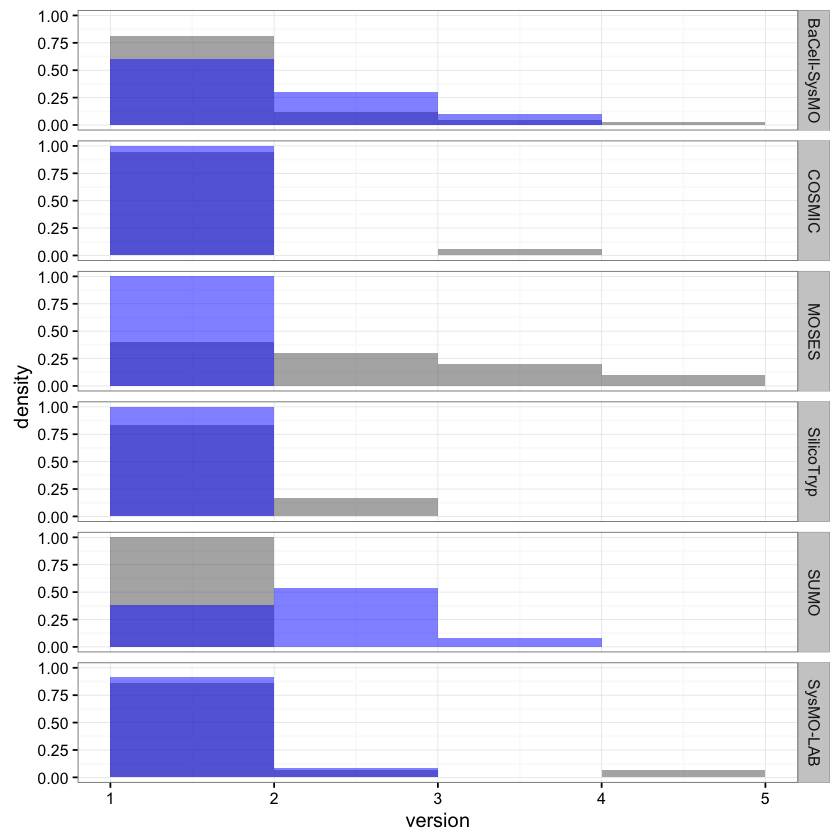

In [16]:
a <- AssetsTable$new()
a$type <- "DataFile"
a$loadtable("data_files")
names(a$data)
# (head(a$data))
# a$graphVerDistribution()
b <- AssetsTable$new()
b$type <- "Model"

b$loadtable("models")

# a$data <- a$data %>% group_by(type) %>% mutate(norm = (count-min(count))/(max(count)-min(count))/participants) 

a$data<-a$data[(a$data$project_name %in% c("COSMIC", "SUMO", "MOSES","SysMO-LAB","SilicoTryp", "BaCell-SysMO")),]
b$data<-b$data[(b$data$project_name %in% c("COSMIC", "SUMO", "MOSES","SysMO-LAB","SilicoTryp", "BaCell-SysMO")),]


p <- ggplot(a$data, aes(version, ..density..)) + geom_histogram(bins = 50,alpha=0.5,binwidth = 1) + 
geom_histogram(data=b$data, aes(version, ..density..), fill="blue",alpha=0.5,bins = 50,binwidth = 1) +
scale_x_continuous(limits = c(1,5))  +
facet_grid(project_name ~ . )
p + scale_fill_grey(start = 0.1, end = .9) + theme_bw()



In [17]:


ds<-getLogBy("update",239)


ds$project_name <- factor(ds$project_name, levels = c("COSMIC",  "SysMO-LAB", "BaCell-SysMO","SUMO", "SilicoTryp","MOSES"))

ds<-ds[(ds$action %in% c("update")),]
ds<-ds[!(ds$activity_loggable_type %in% c("Publication")),]
ds<-ds[!(ds$activity_loggable_type %in% c("Study")),]
ds<-ds[!(ds$activity_loggable_type %in% c("Presentation")),]
ds<-ds[!(ds$activity_loggable_type %in% c("Investigation")),]


dx <- as.data.table(ds)
setkeyv(dx, cols=c('ncreated_at',"project_name","activity_loggable_type"))
ds <- dx[, list(count=.N), by=c('ncreated_at',"project_name","activity_loggable_type")]

ds<-ds[(ds$project_name %in% c("COSMIC", "SUMO", "MOSES","SysMO-LAB","SilicoTryp", "BaCell-SysMO")),]

ds$Date<-ds$ncreated_at
ds$Asset_type<-ds$activity_loggable_type
ds$Activity<-ds$count
ds <- ds %>% group_by(activity_loggable_type)  %>% mutate(norm = (count-min(count))/(max(count)-min(count)))


  ncreated_at project_name activity_loggable_type count       Date Asset_type
1  2010-06-03 BaCell-SysMO                  Assay     5 2010-06-03      Assay
2  2010-06-03 BaCell-SysMO               DataFile     1 2010-06-03   DataFile
3  2010-06-04       COSMIC                  Model     1 2010-06-04      Model
4  2010-06-04 BaCell-SysMO                  Assay     2 2010-06-04      Assay
5  2010-06-04 BaCell-SysMO               DataFile     1 2010-06-04   DataFile
6  2010-06-06        MOSES                    Sop     1 2010-06-06        Sop
  Activity      norm
1        5 0.4444444
2        1 0.0000000
3        1 0.0000000
4        2 0.1111111
5        1 0.0000000
6        1 0.0000000


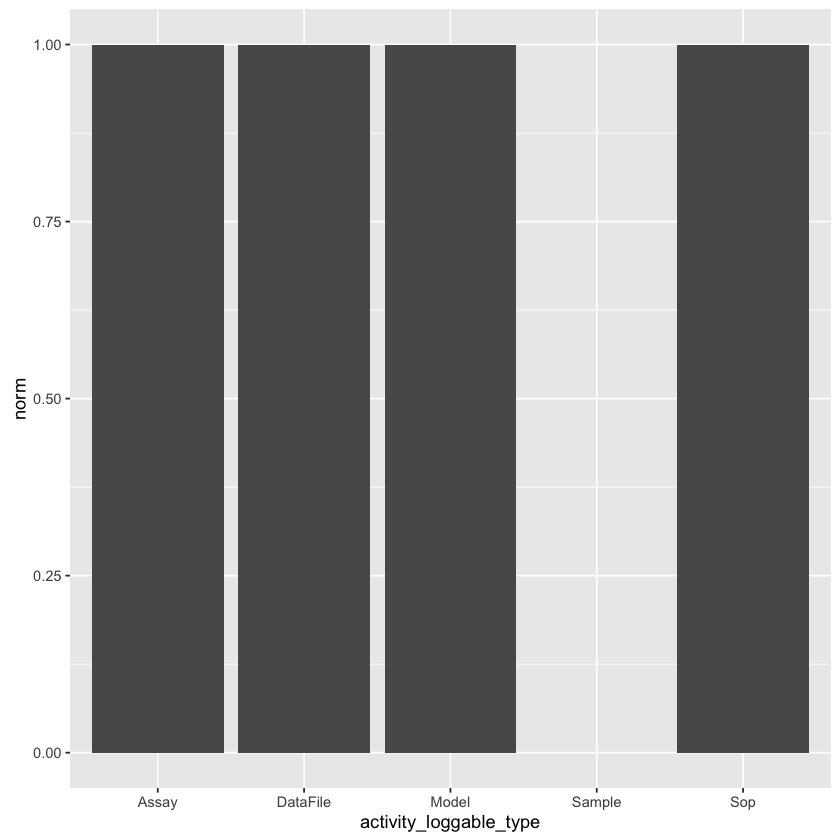

In [18]:

print(head(ds))

p1<- ggplot(ds, aes(activity_loggable_type,norm)) + geom_bar(stat="identity",position="dodge") 
p1

ERROR: Error in graphVerDistribution(): argument "data" is missing, with no default


Warning message:
In `[<-.factor`(`*tmp*`, ds$Asset_type != "Publication", value = "X"): invalid factor level, NA generated

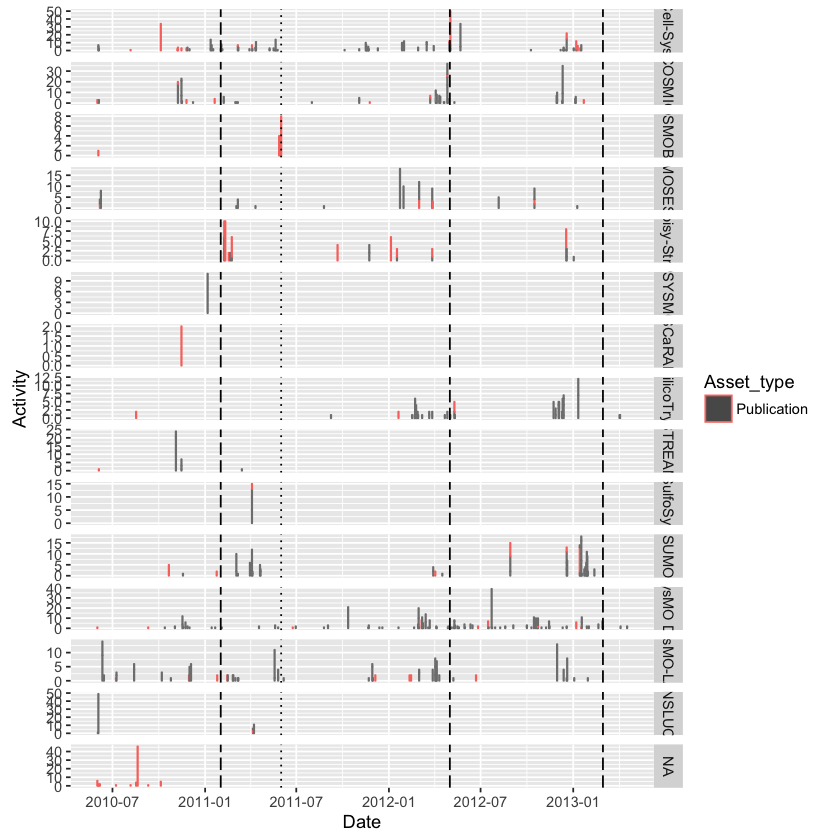

In [19]:


graphVerDistribution()

projectLog<-getLogBy("create",239)


graphLogs2<-function(type,xuser){
    library(ggplot2)

    ds<-getLogBy(type,xuser)
    
    
#     ds<-ds[(ds$project_name %in% c("COSMIC", "SUMO", "MOSES","SysMO-LAB","SilicoTryp", "BaCell-SysMO")),]


    if(type == "create"){
#      ds<-ds[!(ds$activity_loggable_type %in% c("Publication")),]
     ds<-ds[!(ds$activity_loggable_type %in% c("Study")),]
     ds<-ds[!(ds$activity_loggable_type %in% c("Presentation")),]
     ds<-ds[!(ds$activity_loggable_type %in% c("Investigation")),]
    }

    ds <- as.data.table(ds)
    setkeyv(ds, cols=c('ncreated_at',"project_name","activity_loggable_type"))
    ds <- ds[, list(count=.N), by=c('ncreated_at',"project_name","activity_loggable_type")]

    ds$Date<-ds$ncreated_at
    ds$Asset_type<-ds$activity_loggable_type
    ds$Activity<-ds$count
    dps_date<- as.Date("2011-06-01")
#     ds$Asset_type <- as.character(ds$Asset_type)
    ds$Asset_type[ds$Asset_type != "Publication"] <- "X"    

#     ds$Asset_type[ds$Asset_type == "Publication"] <- "apublication"

    
    rects <- data.frame(xstart = as.Date('2011-03-27'), xend = as.Date('2012-03-27'))



    sp <- ggplot(ds, aes(x=Date, y=Activity, group=Asset_type, color=Asset_type))  + geom_bar(stat="identity") 
    sp + facet_grid(project_name ~ . , scales="free_y")   + geom_vline(xintercept = as.numeric(eval11), linetype=5)   + geom_vline(xintercept = as.numeric(eval12), linetype=5)  + geom_vline(xintercept = as.numeric(eval13), linetype=5)   + geom_vline(xintercept = as.numeric(dps_date), linetype=3)    


    
}

graphLogs2("create",239)


Warning message:
In matrix(c(1, 2, 3), 1, 2): data length [3] is not a sub-multiple or multiple of the number of columns [2]

  [1] 1 1 1 1 1 3 1 1 1 1 1 2 1 1 3 2 1 1 4 2 3 2 1 1 1 1 1 1 2 1 3 2 2 2 1 1 1
 [38] 1 1 1 1 4 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 4 2 4 1 1 2 1 4 1 1 1 1 1 1 1
[112] 2 7 3 2 2 2 3 2 2 2 1 2 2 2 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
[186] 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[223] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  rdata Freq
1     1  210
2     2   22
3     3    9
4     4    6
5     7    1
 [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  rdata Freq
1     1   34
[1] 2 4 2 4 1 1 1
  rdata Freq
1     1    3
2     2    2
3     4    2


Warning message:
In ks.test(a, b): cannot compute exact p-value with ties

[1] 0.04514819


Warning message:
In ks.test(a, b): cannot compute exact p-value with ties


	Two-sample Kolmogorov-Smirnov test

data:  a and b
D = 0.57143, p-value = 0.04515
alternative hypothesis: two-sided


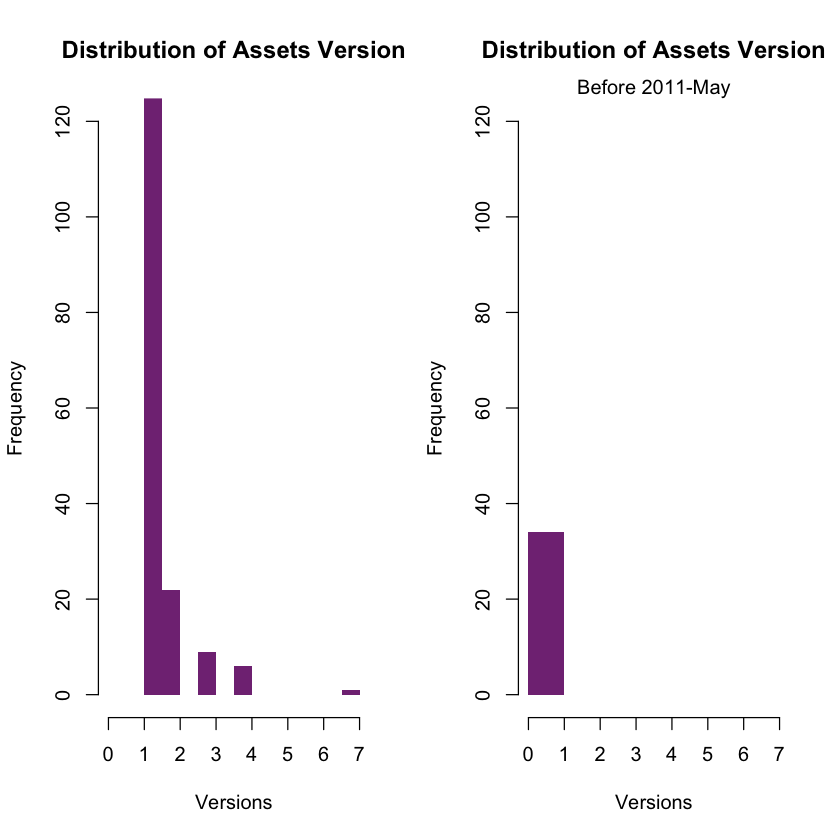

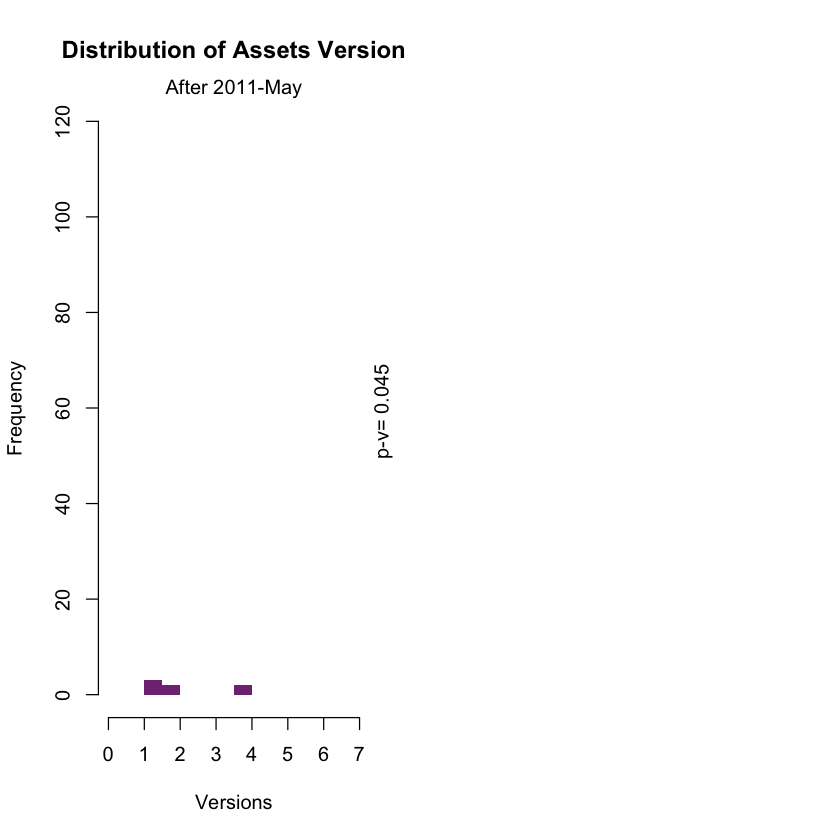

In [20]:


graphDSPEffect<-function(){
    # layout(matrix(c(1,2,3,4),2,2,))
    layout(matrix(c(1,2,3),1,2))

    data <-processCsv("data_files")

        ds<-getLogBy("create",239)
    
#     type <- "create"
#         if(type == "create"){
#         # ds<-ds[!(ds$activity_loggable_type %in% c("Publication")),]
#          ds<-ds[!(ds$activity_loggable_type %in% c("Study")),]
#          ds<-ds[!(ds$activity_loggable_type %in% c("Presentation")),]
#          ds<-ds[!(ds$activity_loggable_type %in% c("Investigation")),]
#         }    
#         data<-ds

       r <- data
 
    x<-graphVerDistribution(r)

     data <-processCsv("data_files")   
    
    r <- data[data$ncreated_at < "2011-06-05",]
    r <- r[r$ncreated_at > "2011-01-01",]
 
    b<-graphVerDistribution(r)




    mtext( "Before 2011-May", side=3)

    # Size distribution
    # data2 <-joinSize(data,"data_files")
    # r2 <- data2[data2$ncreated_at < "2011-05-05",]
    # graphFileSizeDistribution(r2)

    # mtext( "Distribution of Assets Size", side=2)

    data <-processCsv("data_files")

#         data<-ds
    r <- data[data$ncreated_at > "2011-06-07",]
    r <- r[r$ncreated_at < "2011-11-11",]
    a<-graphVerDistribution(r)

    test<-ks.test(a,b)

    print(test$p)

    #   data <- processCsv('models')
    #   r <- data[data$ncreated_at < "2011-05-05",]
    #   graphVerDistribution(r)
    #   
    #   
    #   r <- data[data$ncreated_at > "2011-05-05",]
    #   graphVerDistribution(r)
    mtext( "After 2011-May", side=3)
    mtext(paste("p-v=", round(test$p, digits = 3) ,""), side = 4)

    # Size distribution
    # r2 <- data2[data2$ncreated_at > "2011-05-05",]
    # graphFileSizeDistribution(r2)  

    return( (ks.test(a,b))
    )

}
graphDSPEffect()

The information about the Articles publication dates that apperar i nthe Fairdom page:
- are not in the XML
- Maybe in the database
- or maybe extracted directly 

If in the database i need that table

In [21]:
pjlog = com.load_data('projectLog')

df = pjlog[pjlog['project_name'] == 'SUMO']
# df = df[df['ncreated_at'] <= 15276]
print df[df['activity_loggable_type'] == 'Publication'].head()

pjlog.hist()
#print df


ERROR: Error in parse(text = x, srcfile = src): <text>:5:7: unexpected symbol
4: # df = df[df['ncreated_at'] <= 15276]
5: print df
         ^


## Projects Descriptive Information

- Diversity
- Files size
- Files contributed
- name

In [22]:

# d <- processSharingReportSum(8)
# print(d)

# # graphActivty()
# # graphFreq()
# graphCategories()

### Publication Dates


We can chaeck when did they publish.

This are the dates of all the publication they reported it from 2008 to 2015.



In [23]:
# rm(list = setdiff(ls(), lsf.str()))


In [24]:
pubdata <- read.csv(file=paste0("/Users/kristian/Dropbox/case_sysmo/Data/pub_data/output-cleaned.csv"),sep=",",head=TRUE)
names(pubdata)

[1] "project_id"   "pub_name"     "project_name" "pub_id"       "date_full"   
 [6] "date_pub.2.2" "date_pub.2.3" "date_pub.2.4" "name_id"      "date_pub.2.1"
[11] "project"

In [25]:
# pubdata$date_pub <- toString(pubdata$date_full)
# pubdata$date_pub <- unlist(strsplit(pubdata$date_pub, split='T', fixed=TRUE))[1]
# # print(pubdata)
# pubdata$date_c <- as.Date(as.Date(pubdata$date_pub ))

pubdata_cle = pubdata %>% mutate(date_s = as.character(date_full),
#     date_c = strsplit(date_s, split='T', fixed=TRUE),
    date_n = as.Date((date_s)))



names(pubdata_cle)

# class(pubdata$date_pub)
# pubdata %>% mutate(publicaton_date = as.Date(unlist(strsplit((date_pub), split=':', fixed=TRUE))[2]))                                                                                                                                                      pubdata %>% mutate(publicaton_date=as.Date(unlist(strsplit(toString(date_pub), split=':', fixed=TRUE))[2]))st(strsplit(toString(date_pub), split=':', fixed=TRUE))[2]))

[1] "project_id"   "pub_name"     "project_name" "pub_id"       "date_full"   
 [6] "date_pub.2.2" "date_pub.2.3" "date_pub.2.4" "name_id"      "date_pub.2.1"
[11] "project"      "date_s"       "date_n"

In [26]:
r <- pubdata_cle %>% group_by(project_name) %>%
    arrange(date_n) %>%
    summarise(pub_n = n())
r

Source: local data frame [12 x 2]

   project_name pub_n
         (fctr) (int)
1  BaCell-SysMO    80
2        COSMIC    11
3      KOSMOBAC     7
4         MOSES     7
5   Noisy-Strep    23
6        PSYSMO     6
7    SilicoTryp    11
8        STREAM    16
9      SulfoSys     3
10         SUMO    17
11    SysMO-LAB    11
12  TRANSLUCENT    13

Source: local data frame [197 x 4]
Groups: project_id, project_name [?]

   project_id project_name     date_n events
        (int)       (fctr)     (date)  (int)
1           1 BaCell-SysMO 2007-01-17      1
2           1 BaCell-SysMO 2007-06-22      1
3           1 BaCell-SysMO 2007-09-06      1
4           1 BaCell-SysMO 2007-12-02      1
5           1 BaCell-SysMO 2007-12-11      1
6           1 BaCell-SysMO 2008-03-07      1
7           1 BaCell-SysMO 2008-05-01      1
8           1 BaCell-SysMO 2008-05-21      1
9           1 BaCell-SysMO 2008-05-30      1
10          1 BaCell-SysMO 2008-06-12      1
..        ...          ...        ...    ...


[1] "project_id"   "project_name" "date_n"       "events"       "type"

Source: local data frame [129 x 5]
Groups: project_id, project_name [6]

   project_id project_name     date_n events        type
        (int)       (fctr)     (date)  (int)       (chr)
1           1 BaCell-SysMO 2007-01-17      1 Publication
2           1 BaCell-SysMO 2007-06-22      1 Publication
3           1 BaCell-SysMO 2007-09-06      1 Publication
4           1 BaCell-SysMO 2007-12-02      1 Publication
5           1 BaCell-SysMO 2007-12-11      1 Publication
6           1 BaCell-SysMO 2008-03-07      1 Publication
7           1 BaCell-SysMO 2008-05-01      1 Publication
8           1 BaCell-SysMO 2008-05-21      1 Publication
9           1 BaCell-SysMO 2008-05-30      1 Publication
10          1 BaCell-SysMO 2008-06-12      1 Publication
..        ...          ...        ...    ...         ...


ERROR: Error in eval(expr, envir, enclos): object 'lab' not found


ERROR: Error in colnames(datf2) <- c("project_id", "project_name", "date_n", : object 'datf2' not found


ERROR: Error in eval(expr, envir, enclos): object 'datf2' not found


ERROR: Error in rbind(datf1, datf2): object 'datf2' not found


[1] 129

ERROR: Error in ggplot(datfrplot, aes(date_n, events, group = type, color = as.factor(type))): object 'datfrplot' not found


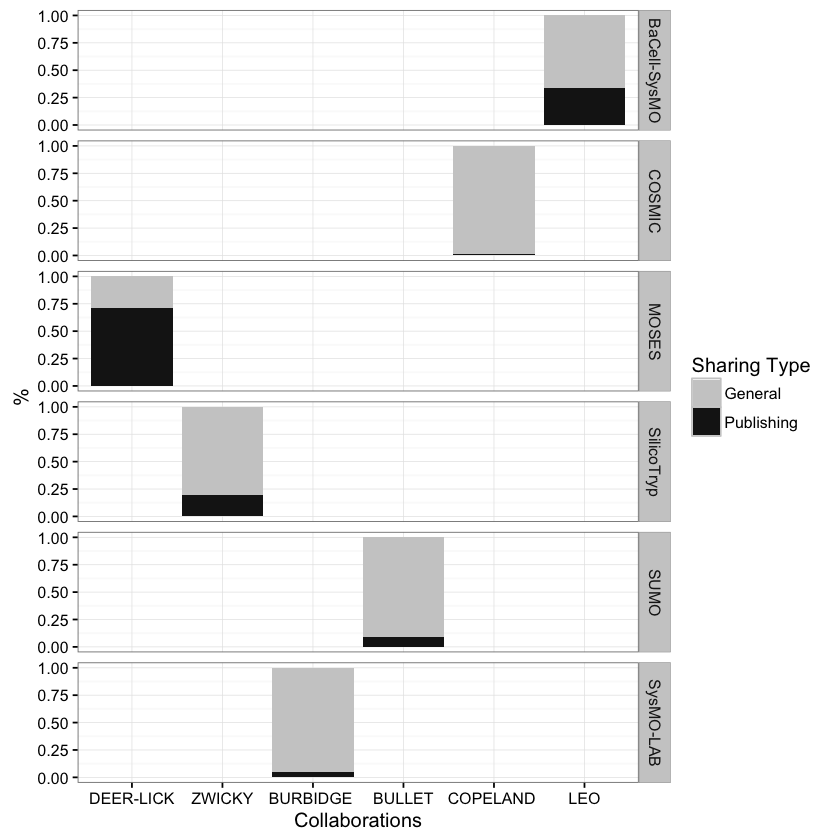

In [27]:

x <- pubdata_cle %>% group_by(project_id,project_name, date_n) %>%
    arrange(date_n) %>%
    summarise(events = n())


print(x)

x = x %>% mutate(norm = (events-min(events))/(max(events)-min(events)))

x$project_name <- factor(x$project_name, levels = c("COSMIC",  "SysMO-LAB", "BaCell-SysMO","SUMO", "SilicoTryp","MOSES"))

x<-x[(x$project_name %in% c("COSMIC", "SUMO", "MOSES","SysMO-LAB","SilicoTryp", "BaCell-SysMO")),]

datf1 = x %>% select(project_name, date_n, events)
datf1$type <- "Publication"
names(datf1)
print(datf1)
datf2 = pdf4 %>% select(lab, project_name, ncreated_at, count, type)
colnames(datf2) <- c("project_id","project_name", "date_n", "events","type")
names(datf2)

datfrplot <- rbind(datf1,datf2)

NROW(datf1)

p7<- ggplot(datfrplot, aes(date_n,events, group=type, color=as.factor(type))) + 
     geom_bar(stat="identity") 
#      geom_bar(pdf4, aes(x=Date, y=norm)) 
p7 + facet_grid(project_name~., )   + geom_vline(xintercept = as.numeric(eval11), linetype=5) +
geom_vline(xintercept = as.numeric(eval12), linetype=5)  + 
geom_vline(xintercept = as.numeric(eval13), linetype=5) + 
geom_vline(xintercept = as.numeric(dps_date), linetype=3)




### Publications Distribution

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


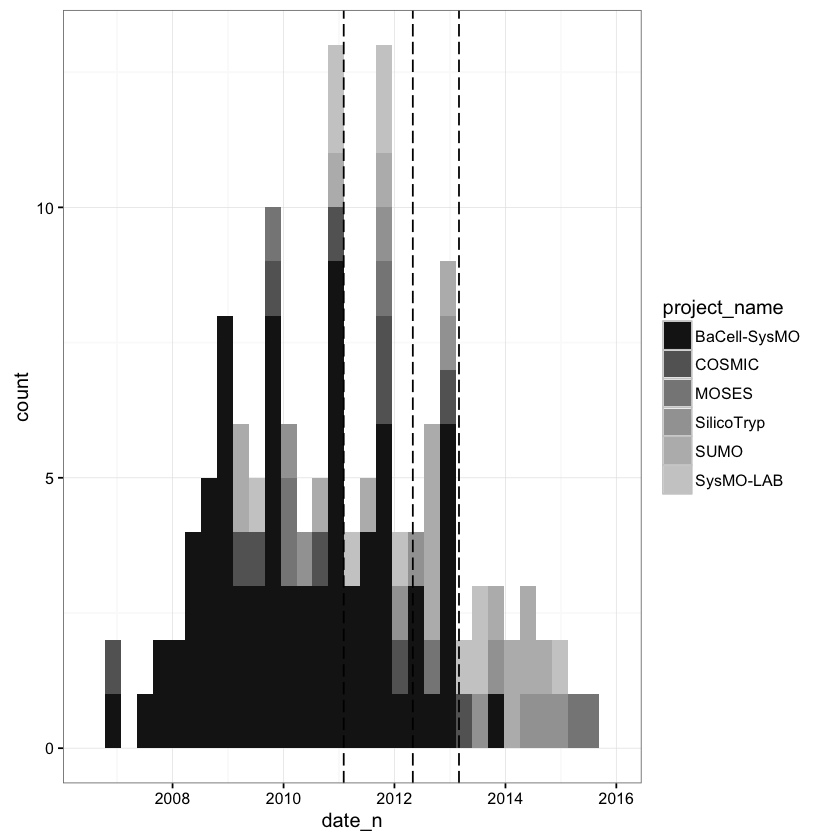

In [28]:
datehist <- ggplot(pubdata_cle %>%  filter(project_name == "SUMO" |
                  project_name == "SilicoTryp" |
                  project_name == "MOSES" |
                  project_name == "SysMO-LAB" |
                  project_name == "BaCell-SysMO" |
                  project_name == "COSMIC"), aes(date_n, fill=project_name)) + 
geom_histogram()    + 
geom_vline(xintercept = as.numeric(eval11), linetype=5)   + 
geom_vline(xintercept = as.numeric(eval12), linetype=5)  + 
geom_vline(xintercept = as.numeric(eval13), linetype=5)  + 
scale_fill_grey(start = 0.1, end = .8) + theme_bw() 
datehist

> Bacell was publicating  since very early

#### The last Article published by the collaborations

In [29]:
chk_recent_pub <- pubdata_cle %>% group_by(project_name) %>%
    arrange(date_n) %>% filter(project_name == "SUMO" |
                  project_name == "SilicoTryp" |
                  project_name == "MOSES" |
                  project_name == "SysMO-LAB" |
                  project_name == "BaCell-SysMO" |
                  project_name == "COSMIC") %>% 
    summarise(events = n(), recent = max(date_n))

print(chk_recent_pub)

Source: local data frame [6 x 3]

  project_name events     recent
        (fctr)  (int)     (date)
1 BaCell-SysMO     80 2013-12-05
2       COSMIC     11 2013-05-03
3        MOSES      7 2015-08-01
4   SilicoTryp     11 2014-12-01
5         SUMO     17 2014-09-30
6    SysMO-LAB     11 2014-12-19


In [30]:
chk_recent_act <- pdf4 %>% group_by(project_name) %>%
    arrange(Date) %>% filter(project_name == "SUMO" |
                  project_name == "SilicoTryp" |
                  project_name == "MOSES" |
                  project_name == "SysMO-LAB" |
                  project_name == "BaCell-SysMO" |
                  project_name == "COSMIC") %>% 
    summarise( recent_a = max(Date))

print(chk_recent_act)

Source: local data table [6 x 2]

  project_name   recent_a
        (fctr)     (date)
1       COSMIC 2013-01-06
2    SysMO-LAB 2013-01-30
3 BaCell-SysMO 2013-01-07
4         SUMO 2013-02-12
5   SilicoTryp 2013-04-03
6        MOSES 2013-01-09


In [31]:
activity_events <- inner_join(chk_recent_act,chk_recent_pub,copy = TRUE)
print(activity_events)



Joining by: "project_name"


Source: local data table [6 x 4]

  project_name   recent_a events     recent
        (fctr)     (date)  (int)     (date)
1       COSMIC 2013-01-06     11 2013-05-03
2    SysMO-LAB 2013-01-30     11 2014-12-19
3 BaCell-SysMO 2013-01-07     80 2013-12-05
4         SUMO 2013-02-12     17 2014-09-30
5   SilicoTryp 2013-04-03     11 2014-12-01
6        MOSES 2013-01-09      7 2015-08-01


In [32]:
activity_events_df<- data.frame(activity_events)
anon_names2 <- read.csv(file="/Users/kristian/Dropbox/case_sysmo/Data/project_names_anon.csv",sep=",",head=TRUE)
anon_names2$project_name <- as.factor(anon_names2$project_name)
anon_names2$project_name_anon <- as.factor(anon_names2$project_name_anon)
activity_events_df <- inner_join(activity_events_df, anon_names2)




Joining by: "project_name"
Warning message:
In inner_join_impl(x, y, by$x, by$y): joining factors with different levels, coercing to character vector

In [33]:
library(xtable)




tbl<-xtable((activity_events_df %>% select(project_name_anon, recent_a, recent) %>%
             mutate(recent=as.character(recent),recent_a=as.character(recent_a)) %>%
          arrange(recent)),booktabs=TRUE, 
          caption="Comaprison between last publication and last activity in the SDR", 
          label="tbllastpublication", only.contents=TRUE)

print(tbl)

% latex table generated in R 3.2.3 by xtable 1.8-0 package
% Tue Mar 22 09:08:29 2016
\begin{table}[ht]
\centering
\begin{tabular}{rlll}
  \hline
 & project\_name\_anon & recent\_a & recent \\ 
  \hline
1 & COPELAND  & 2013-01-06 & 2013-05-03 \\ 
  2 & LEO & 2013-01-07 & 2013-12-05 \\ 
  3 & BULLET & 2013-02-12 & 2014-09-30 \\ 
  4 & ZWICKY & 2013-04-03 & 2014-12-01 \\ 
  5 & BURBIDGE  & 2013-01-30 & 2014-12-19 \\ 
  6 & DEER-LICK & 2013-01-09 & 2015-08-01 \\ 
   \hline
\end{tabular}
\caption{Comaprison between last publication and last activity in the SDR} 
\label{tbllastpublication}
\end{table}


## REview crises with critical cases
Not funded cases can work as critical cases that were not in the ciriss but can still put data and still have work related.

>This are not critical cases. because its obvious that they would not share data when the pressure is removed.


In [34]:

logsstable<- LogsTable$new()
logsstable$loadtable()
logsstable$getLogBy()
ds<-logsstable$data


ds<-ds[(ds$action %in% c("create")),]
ds<-ds[!(ds$activity_loggable_type %in% c("Publication")),]
ds<-ds[!(ds$activity_loggable_type %in% c("Study")),]
ds<-ds[!(ds$activity_loggable_type %in% c("Presentation")),]
ds<-ds[!(ds$activity_loggable_type %in% c("Investigation")),]



names(ds)

dx <- as.data.table(ds)
setkeyv(dx, cols=c('ncreated_at',"project_name","activity_loggable_type"))
ds <- dx[, list(count=.N), by=c('ncreated_at',"project_name","activity_loggable_type")]


ds$Date<-ds$ncreated_at
ds$Asset_type<-ds$activity_loggable_type
ds$Activity<-ds$count


ds2 <- ds
pdf2 <- ds2  %>% arrange(Date)  %>% mutate(cmml = cumsum(Activity))

# pdf2 %>% group_by(project_name, Asset_type )%>% arrange(Date) %>% summarise(evetns=n(),sactivity=sum(Activity),scmml=sum(cmml)  )
pdf2 %>% group_by(project_name, Date  )%>% arrange(Date) %>% summarise(evetns=n(),sactivity=sum(Activity),scmml=sum(cmml)  )


[1] "data.frame"
[1] 82876
[1] "data.frame"
[1] 2011


[1] "project_id"             "id"                     "action"                
 [4] "format"                 "activity_loggable_type" "activity_loggable_id"  
 [7] "culprit_type"           "contributor_id"         "referenced_type"       
[10] "created_at"             "updated_at"             "http_referer"          
[13] "user_agent"             "ncreated_at"            "nupdated_at"           
[16] "project_name"

ERROR: Error in dimnames.data.table(x): data.table inherits from data.frame (from v1.5) but this data.table does not. Has it been created manually (e.g. by using 'structure' rather than 'data.table') or saved to disk using a prior version of data.table? The correct class is c('data.table','data.frame').


Source: local data table [177 x 5]
Groups: project_name

   project_name       Date evetns sactivity scmml
         (fctr)     (date)  (int)     (int) (int)
1  BaCell-SysMO 2010-06-03      1         1     2
2  BaCell-SysMO 2011-01-12      2         6   257
3  BaCell-SysMO 2011-01-14      2         3   266
4  BaCell-SysMO 2011-02-02      2         4   274
5  BaCell-SysMO 2011-02-04      1         1   140
6  BaCell-SysMO 2011-03-07      2         3   304
7  BaCell-SysMO 2011-03-08      1         1   155
8  BaCell-SysMO 2011-03-30      1         2   158
9  BaCell-SysMO 2011-04-04      1         1   159
10 BaCell-SysMO 2011-04-05      1         1   170
..          ...        ...    ...       ...   ...

In [35]:
pdf2 <- data.frame(pdf2)
pdf23 <- inner_join(pdf2, anon_names)

x<-getProjInfo()
print(x)
x$act<-x$activity
x$project_name<-as.factor(x$project_name)

pdf23 <- inner_join(pdf23,x)
pdf23 <- filter(pdf23, fund != "N")

head(pdf23)

Joining by: "project_name"
Warning message:
In inner_join_impl(x, y, by$x, by$y): joining factors with different levels, coercing to character vector

   id          name interview  fund openShare activity lifetime  project_name
1   1  BaCell-SysMO      TRUE  TRUE      TRUE    FALSE        3  BaCell-SysMO
2   2        COSMIC     FALSE  TRUE      TRUE    FALSE        3        COSMIC
3   3          SUMO      TRUE  TRUE      TRUE    FALSE        3          SUMO
4   4      KOSMOBAC     FALSE FALSE     FALSE    FALSE        1      KOSMOBAC
5   5     SysMO-LAB      TRUE  TRUE     FALSE    FALSE        3     SysMO-LAB
6   6        PSYSMO     FALSE FALSE     FALSE    FALSE        1        PSYSMO
7   7        SCaRAB     FALSE FALSE     FALSE    FALSE        1        SCaRAB
8   8         MOSES      TRUE FALSE      TRUE    FALSE        1         MOSES
9   9   TRANSLUCENT     FALSE  TRUE     FALSE    FALSE        1   TRANSLUCENT
10 10        STREAM     FALSE FALSE     FALSE    FALSE        1        STREAM
11 11      SulfoSys     FALSE FALSE     FALSE    FALSE        1      SulfoSys
12 12      SysMO DB     FALSE  TRUE     FALSE    FALSE        3 

Joining by: "project_name"
Warning message:
In inner_join_impl(x, y, by$x, by$y): joining character vector and factor, coercing into character vector

ncreated_at project_name activity_loggable_type count       Date Asset_type
1  2010-06-02  TRANSLUCENT                  Assay     1 2010-06-02      Assay
2  2010-06-03 BaCell-SysMO               DataFile     1 2010-06-03   DataFile
3  2010-06-03  TRANSLUCENT                  Assay    45 2010-06-03      Assay
4  2010-06-04       COSMIC                  Model     2 2010-06-04      Model
5  2010-06-06        MOSES                    Sop     1 2010-06-06        Sop
6  2010-06-08        MOSES                  Assay     4 2010-06-08      Assay
  Activity cmml project_name_anon id         name interview  fund openShare
1        1    1           SEYFERT  9  TRANSLUCENT     FALSE  TRUE     FALSE
2        1    2               LEO  1 BaCell-SysMO      TRUE  TRUE      TRUE
3       45   47           SEYFERT  9  TRANSLUCENT     FALSE  TRUE     FALSE
4        2   49         COPELAND   2       COSMIC     FALSE  TRUE      TRUE
5        1   50         DEER-LICK  8        MOSES      TRUE FALSE      TRUE
6        4   54         DEER-LICK  8        MOSES      TRUE FALSE      TRUE
  activity lifetime   act
1    FALSE        1 FALSE
2    FALSE        3 FALSE
3    FALSE        1 FALSE
4    FALSE        3 FALSE
5    FALSE        1 FALSE
6    FALSE        1 FALSE

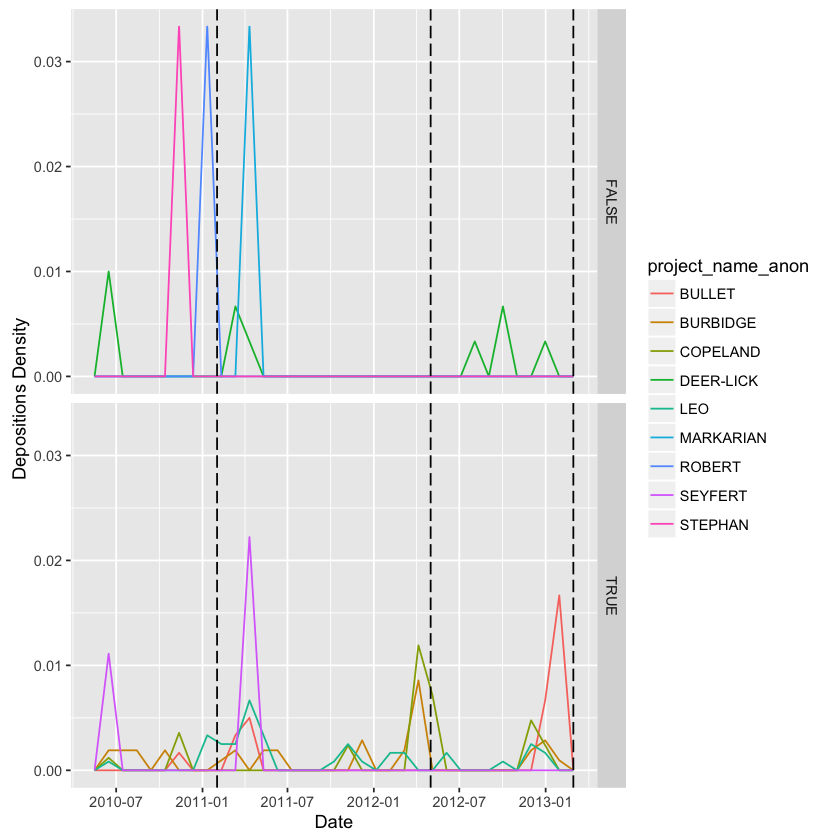

In [36]:


# datehist <- ggplot(pdf23, aes(Date, fill=project_name_anon)) + 
datehist <- ggplot(pdf23, aes(Date, ..density.., colour =project_name_anon)) + 
geom_freqpoly(binwidth = 30)   + 
geom_vline(xintercept = as.numeric(eval11), linetype=5)   + 
geom_vline(xintercept = as.numeric(eval12), linetype=5)  + 
geom_vline(xintercept = as.numeric(eval13), linetype=5)  + 
# scale_fill_grey(start = 0.1, end = .8) + theme_bw() + 
labs(colours = "Collaborations", y="Depositions Density")  
#+ geom_vline(xintercept = as.numeric(dps_date), linetype=3) 


# dal2 <- geom_text(aes(x = as.numeric(eval11), y=15, label="Evaluation"), colour="blue", angle=90, text=element_text(size=11)) 
# dal2 <- geom_text(aes(x = as.numeric(eval12), y=15, label="Evaluation"), colour="blue", angle=90, text=element_text(size=11)) 
# dal2 <- geom_text(aes(x = as.numeric(eval13), y=15, label="Evaluation"), colour="blue", angle=90, text=element_text(size=11)) 


p4<-datehist + facet_grid(fund ~ . )
p4
# ggsave("~/Dropbox/case_sysmo/images/figcontributionhist2.png")

